# K-Nearest Neighbors (KNN) Algorithm (preview)

The K-Nearest Neighbors (KNN) algorithm is a non-parametric, supervised machine learning algorithm used for both classification and regression tasks. It's conceptually simple yet powerful, often serving as a good baseline model.

## How KNN Works

The core idea behind KNN is that similar things are near to each other. When you want to classify a new data point, KNN looks at its 'k' nearest neighbors (data points with known classifications) in the feature space and assigns the new point the class that is most common among those 'k' neighbors.

Let's break down the steps:

1.  **Choose the Number of Neighbors (K):** This is the most crucial parameter. You decide how many neighbors to consider.
2.  **Calculate Distance:** For a new data point you want to classify, KNN calculates its distance to every other point in the training dataset. Common distance metrics include:
    * **Euclidean Distance:** The most common. For two points $(x_1, y_1)$ and $(x_2, y_2)$ in 2D, it's $\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$. In N-dimensions, it generalizes to $\sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$.
    * **Manhattan Distance (Taxicab Distance):** Sum of the absolute differences of their Cartesian coordinates. For two points $(x_1, y_1)$ and $(x_2, y_2)$, it's $|x_2 - x_1| + |y_2 - y_1|$.
    * **Minkowski Distance:** A generalization of Euclidean and Manhattan distances.
3.  **Find K Nearest Neighbors:** After calculating all distances, the algorithm selects the 'k' data points from the training set that are closest to the new data point.
4.  **Vote for Classification (for Classification problems):**
    * For classification tasks, the algorithm looks at the classes of these 'k' nearest neighbors.
    * The new data point is assigned the class that is most frequent among these 'k' neighbors. In case of a tie, different implementations handle it differently (e.g., choose the class of the closest neighbor, or random selection).
5.  **Average for Regression (for Regression problems):**
    * For regression tasks, the algorithm takes the average (or weighted average) of the target values of the 'k' nearest neighbors.

## Simple Examples

Let's illustrate with a very basic 2D classification example.

Imagine we have two classes: "Apples" (A) and "Oranges" (O), based on two features: "Sweetness" and "Crunchiness".

**Training Data:**

| Sweetness | Crunchiness | Fruit  |
| :-------- | :---------- | :----- |
| 7         | 3           | Apple  |
| 6         | 4           | Apple  |
| 2         | 8           | Orange |
| 3         | 7           | Orange |
| 5         | 5           | Apple  |

**New Data Point to Classify:** (Sweetness: 4, Crunchiness: 6) - Let's call this "Mystery Fruit".

Let's set $K=3$.

**Step 1: Calculate Euclidean Distances from Mystery Fruit (4, 6) to all training points:**

* **To (7, 3) - Apple:** $\sqrt{(7-4)^2 + (3-6)^2} = \sqrt{3^2 + (-3)^2} = \sqrt{9 + 9} = \sqrt{18} \approx 4.24$
* **To (6, 4) - Apple:** $\sqrt{(6-4)^2 + (4-6)^2} = \sqrt{2^2 + (-2)^2} = \sqrt{4 + 4} = \sqrt{8} \approx 2.83$
* **To (2, 8) - Orange:** $\sqrt{(2-4)^2 + (8-6)^2} = \sqrt{(-2)^2 + 2^2} = \sqrt{4 + 4} = \sqrt{8} \approx 2.83$
* **To (3, 7) - Orange:** $\sqrt{(3-4)^2 + (7-6)^2} = \sqrt{(-1)^2 + 1^2} = \sqrt{1 + 1} = \sqrt{2} \approx 1.41$
* **To (5, 5) - Apple:** $\sqrt{(5-4)^2 + (5-6)^2} = \sqrt{1^2 + (-1)^2} = \sqrt{1 + 1} = \sqrt{2} \approx 1.41$

**Step 2: Find K=3 Nearest Neighbors (smallest distances):**

1.  (3, 7) - Orange (Distance: 1.41)
2.  (5, 5) - Apple (Distance: 1.41)
3.  (2, 8) - Orange (Distance: 2.83) *OR* (6, 4) - Apple (Distance: 2.83) - Let's pick (2,8) for now.

**Step 3: Vote for Classification:**

The 3 nearest neighbors are:
* Orange
* Apple
* Orange

Two of the three neighbors are "Orange". Therefore, the "Mystery Fruit" is classified as an **Orange**.

## KNN in Python (using scikit-learn)


--- Example 1: Simple Classification ---
Mystery Fruit (Sweetness: 4, Crunchiness: 6) is predicted to be: Orange


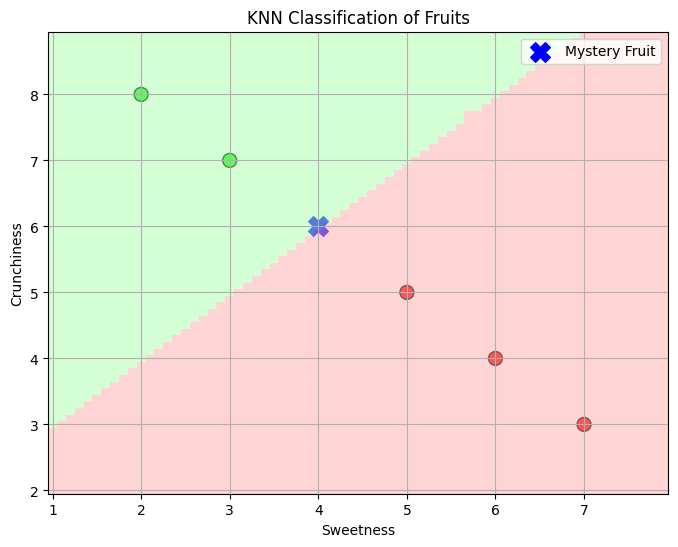


--- Example 2: Simple Regression ---
Predicted price for a 90 sq meter house: $153,333.33


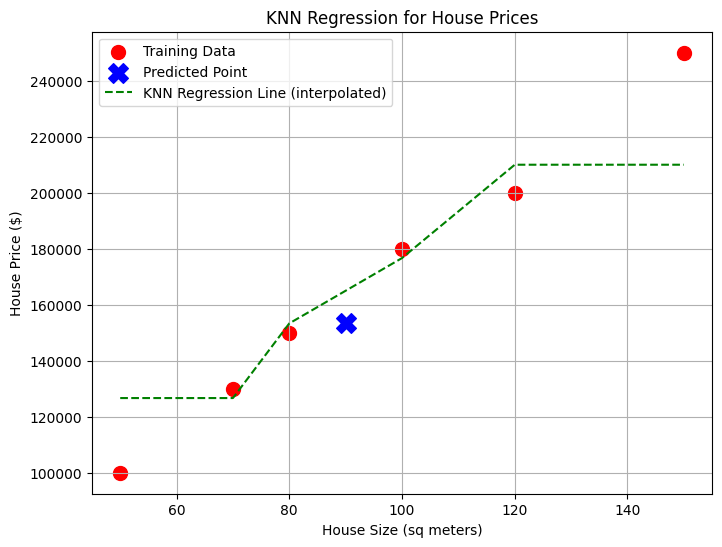

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# --- Example 1: Simple Classification ---

# Data: Sweetness, Crunchiness, Fruit (0 for Apple, 1 for Orange)
X_train = np.array([
    [7, 3],
    [6, 4],
    [2, 8],
    [3, 7],
    [5, 5]
])
y_train = np.array([0, 0, 1, 1, 0]) # 0: Apple, 1: Orange

# New data point to classify
mystery_fruit = np.array([[4, 6]])

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make a prediction
prediction = knn.predict(mystery_fruit)

print(f"--- Example 1: Simple Classification ---")
print(f"Mystery Fruit (Sweetness: 4, Crunchiness: 6) is predicted to be: {'Orange' if prediction[0] == 1 else 'Apple'}")

# --- Visualizing the decision boundary (more complex but illustrative) ---

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFaa']) # Light red/green
cmap_bold = ListedColormap(['#FF0000', '#00FF00']) # Dark red/green

# Plot the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=100)
plt.scatter(mystery_fruit[:, 0], mystery_fruit[:, 1], c='blue', marker='X', s=200, label='Mystery Fruit')
plt.xlabel('Sweetness')
plt.ylabel('Crunchiness')
plt.title('KNN Classification of Fruits')
plt.legend()
plt.grid(True)

# Create a mesh grid to plot decision boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto', alpha=0.5)

plt.show()

# --- Example 2: KNN for Regression ---

# Let's say we want to predict a house price (target) based on size (feature)
# Small dataset for demonstration
house_sizes = np.array([
    [50],  # 50 sq meters
    [70],
    [80],
    [100],
    [120],
    [150]
])
house_prices = np.array([
    100000, # 100k
    130000,
    150000,
    180000,
    200000,
    250000
])

# New house size to predict price for
new_house_size = np.array([[90]]) # 90 sq meters

from sklearn.neighbors import KNeighborsRegressor

# Create a KNN regressor with k=3
knn_reg = KNeighborsRegressor(n_neighbors=3)

# Train the model
knn_reg.fit(house_sizes, house_prices)

# Make a prediction
predicted_price = knn_reg.predict(new_house_size)

print(f"\n--- Example 2: Simple Regression ---")
print(f"Predicted price for a {new_house_size[0][0]} sq meter house: ${predicted_price[0]:,.2f}")

# Plotting for regression
plt.figure(figsize=(8, 6))
plt.scatter(house_sizes, house_prices, color='red', s=100, label='Training Data')
plt.scatter(new_house_size, predicted_price, color='blue', marker='X', s=200, label='Predicted Point')
plt.plot(house_sizes, knn_reg.predict(house_sizes), color='green', linestyle='--', label='KNN Regression Line (interpolated)')
plt.xlabel('House Size (sq meters)')
plt.ylabel('House Price ($)')
plt.title('KNN Regression for House Prices')
plt.legend()
plt.grid(True)
plt.show()

## Key Considerations and Hyperparameters

1.  **Choice of K:**
    * **Small K (e.g., K=1):** The model becomes sensitive to noise in the training data and can lead to overfitting. The decision boundary will be more complex and irregular.
    * **Large K:** The model becomes smoother and less sensitive to noise, but it might oversimplify the decision boundary, leading to underfitting. It might also cause the model to miss subtle patterns.
    * **Odd K for Classification:** For binary classification, choosing an odd K avoids ties in voting.
    * **How to choose K:** Cross-validation is the most common method to find an optimal K.

2.  **Distance Metric:**
    * Euclidean distance is the most common.
    * Manhattan distance is useful when the difference between features is more important than their squared difference (e.g., grid-like movements).
    * Minkowski distance allows you to experiment with different powers ($p=1$ for Manhattan, $p=2$ for Euclidean).

3.  **Feature Scaling:**
    * **Crucial for KNN!** KNN is a distance-based algorithm. If features have different scales (e.g., one feature ranges from 0-1000 and another from 0-1), the feature with the larger scale will disproportionately influence the distance calculation.
    * You should normalize or standardize your features (e.g., using `StandardScaler` or `MinMaxScaler` from scikit-learn) before applying KNN.

4.  **Curse of Dimensionality:**
    * As the number of features (dimensions) increases, the concept of "distance" becomes less meaningful. Data points in high-dimensional space tend to be equidistant from each other, making it difficult for KNN to find true nearest neighbors.
    * KNN performance can degrade significantly in very high-dimensional datasets. Dimensionality reduction techniques (like PCA) can sometimes help.

### Advantages of KNN

* **Simple to Understand and Implement:** Its intuitive nature makes it easy to grasp.
* **No Training Phase (Lazy Learner):** KNN is a "lazy learner" because it doesn't build a model explicitly during the training phase. All it does is store the training data. The computation happens only when a prediction is requested.
* **Non-parametric:** It makes no assumptions about the underlying data distribution.
* **Adaptable:** Can be used for both classification and regression.

### Disadvantages of KNN

* **Computationally Expensive at Prediction Time:** For large datasets, finding the 'k' nearest neighbors for each new data point can be very slow, as it requires calculating distances to all training points.
* **Memory Intensive:** Stores the entire training dataset in memory.
* **Sensitive to Irrelevant Features:** Irrelevant features can negatively impact performance because they contribute to the distance calculation.
* **Sensitive to Data Scaling:** As mentioned, features with larger scales can dominate the distance calculations.
* **Poor Performance in High Dimensions (Curse of Dimensionality):** Performance degrades significantly with many features.

### When to Use KNN

KNN is often a good choice when:

* Your dataset is relatively small.
* The data is clean and doesn't have many noisy outliers.
* You need a simple, interpretable model.
* You don't have time to build more complex models and need a quick baseline.

In summary, KNN is a fundamental and straightforward algorithm that provides a solid foundation for understanding instance-based learning. While it has limitations, especially with large or high-dimensional datasets, its simplicity and effectiveness make it a valuable tool in many machine learning scenarios.